# Particle in a Box 1D


In [1]:
# for plotting
!pip install matplotlib

# linear algebra
!pip install numpy


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Time Independent Schrodinger Equation
The TISE is
$$
-\frac{\hbar^2}{2m} 
\frac{\mathrm{d}^2\psi}
     {\mathrm{d}x^2}+V(x)\psi=E\psi
$$
which we can write as
$$
\left[
  -\frac{\hbar^2}{2m} 
  \frac{\mathrm{d}^2}{\mathrm{d}x^2}+V(x)
\right]
\psi
=
E\psi
$$
We recognize that the left hand side is an linear operator acting on a state function and the right hand side is product of a constant (E) and the state function.  The operator on the left hand side is known as the Hamiltonian $\hat{H}$
$$
\hat{H}=\left[
  -\frac{\hbar^2}{2m} 
  \frac{\mathrm{d}^2}{\mathrm{d}x^2}
  +V(x)
\right]
$$
The first term of $\hat{H}$ is the kinetic operator $\hat{T}$ and the second term is the potential operator $\hat{V}$
$$\begin{gather}
\hat{T}=-\frac{\hbar^2}{2m} 
\frac{\mathrm{d}^2}{\mathrm{d}x^2}
\\
\hat{V}=V(x)

\end{gather}$$

Interested in solving the TISE on a box of length $L$ with the boundary condition $\psi(0)=\psi(L)=0$.



In [3]:
hbar = 1.054571817e-34 #J s
m_e  = 9.10938356e-31        # kg - mass of electron
eV   = 1.602176634e-19       # J per eV

## Particle in a Box

Interested in solving the TISE on a box of length $L$ with the boundary condition $\psi(0)=\psi(L)=0$.



In [4]:
# define our domain
L = 1e-9  #1 nm box
N = 100 # number of points

Let
$$
\mathbf{x}=(x_0,x_2,\ldots,x_N)
$$
where $x_N=L$


In [5]:
x = np.linspace(0,L,N)
# print("x:",x)

the spacing between the points are
$$
\Delta x = x_{i+1}-x_i=x_1-x_0
$$

In [6]:
dx = x[1]-x[0]
# print("dx:",dx)

We want to define
$$
\alpha = - \frac{\hbar^2}{2 m_e dx^2}
$$

In [7]:
alpha = -hbar**2 / (2*m_e*dx**2)

## Kinetic Operator

### Definition: Derivative

$$
  \frac{\mathrm{d}\psi}{\mathrm{d}x}
  =
  \lim_{\Delta x \to 0} \frac{\psi_{i+1}-\psi_{i}}{\Delta x}
$$
$\blacksquare$

To approximate the derivative, we can can approximate
$$
x=(x_0,x_1,\ldots,x_N)
$$

To approximate psi, we likewise do
$$\begin{align}
  \psi=(\psi_0,\psi_1,\ldots,\psi_N)
\end{align}$$

## second derivative (central differences)
For interior points,
$$
\frac{\mathrm{d}^2\psi}{\mathrm{d}x^2}(x_i)
\approx
\frac{\psi_{i+1} - 2\psi_i + \psi_{i-1}}{(\Delta x)^2}.
$$

We start from
$$
\left(\nabla^2_{\Delta x} \psi\right)_i
=
\frac{1}{(\Delta x)^2}
\bigl(\psi_{i+1} - 2\psi_i + \psi_{i-1}\bigr).
$$

As a system of equations, this is

\begin{align}
\left(\nabla^2_{\Delta x} \psi\right)_0
&=
\frac{1}{(\Delta x)^2}
\bigl(
  -2\psi_0 + \psi_1
\bigr),
\\[6pt]
\left(\nabla^2_{\Delta x} \psi\right)_1
&=
\frac{1}{(\Delta x)^2}
\bigl(
  \psi_2 - 2\psi_1 + \psi_0
\bigr),
\\[6pt]
\left(\nabla^2_{\Delta x} \psi\right)_2
&=
\frac{1}{(\Delta x)^2}
\bigl(
  \psi_3 - 2\psi_2 + \psi_1
\bigr),
\\[6pt]
&\ \ \vdots
\\[6pt]
\left(\nabla^2_{\Delta x} \psi\right)_{N-1}
&=
\frac{1}{(\Delta x)^2}
\bigl(
  \psi_{N} - 2\psi_{N-1} + \psi_{N-2}
\bigr),
\\[6pt]
\left(\nabla^2_{\Delta x} \psi\right)_{N}
&=
\frac{1}{(\Delta x)^2}
\bigl(
  \psi_{N-1} - 2\psi_{N}
\bigr).
\end{align}

For the **interior points** $i = 1,2,\dots,N-1$, the pattern is

\begin{align}
\left(\nabla^2_{\Delta x} \psi\right)_i
&=
\frac{1}{(\Delta x)^2}
\bigl(
  \psi_{i+1} - 2\psi_{i} + \psi_{i-1}
\bigr),
\qquad i = 1,2,\dots,N-1.
\end{align}


this can be written in matrix form as
Thus,
$$
\nabla^2_{\Delta x}
=
\frac{1}{(\Delta x)^2}
\begin{bmatrix}
-2 & 1 & 0 & \cdots & 0 \\
1 & -2 & 1 & \ddots & \vdots \\
0 & 1 & -2 & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & 1 \\
0 & \cdots & 0 & 1 & -2
\end{bmatrix}
\begin{bmatrix}
\psi_0 \\
\psi_1 \\
\vdots \\
\psi_{N-1} \\
\psi_N
\end{bmatrix}
$$


In [8]:
diag_main  = -2.0 * np.ones(N)
diag_upper =  1.0 * np.ones(N-1)
diag_lower =  1.0 * np.ones(N-1)

laplacian = (
    np.diag(diag_main) +
    np.diag(diag_upper,  k=1) +
    np.diag(diag_lower,  k=-1)
)

In [9]:
print("laplacian:",laplacian)

laplacian: [[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]


# Kinetic Energy Operator
$$\hat{T}$$

In [10]:
# kinetic energy operator
T_op = alpha * laplacian



# Hamiltonian
The TISE can be expressed as an eigenproblem
$$
  \hat{H}\psi=E\psi
$$

$$
  \hat{H}=\hat{T}+\hat{V}
$$

In [11]:
# hamiltonian operator
# H_op = T_op + V_op, but V_op =0
H_op = T_op

# Eigenvalue Eigenvector

$$
\hat{H}\psi=E\psi
$$
so solving the eigenvalues and eigenvectors will give us
$$
  E={E_0,\ldots,E_N}
$$
$$
  \psi={\psi_0,\ldots,\psi_N}
$$

In [12]:
# schroedinger equation is an eigevalue/eigenvector problem
E, psi = np.linalg.eigh(H_op)

In [13]:
#print(E)

In [14]:
#print(psi)

In [15]:
# normalize our eigenvectors
psi_norm = np.zeros_like(psi)
for n in range(N):
  norm = np.sqrt(np.trapezoid(np.abs(psi[:, n])**2, x))
  psi_norm[:, n] = psi[:, n] / norm

In [16]:
print("psi_norm:",psi_norm)

psi_norm: [[  1377.00187904  -2752.75058144  -4125.99347825 ...  -4125.99347825
   -2752.75058144   1377.00187904]
 [  2752.67159768  -5494.85130566  -8216.0854327  ...   8216.0854327
    5494.85130566  -2752.67159768]
 [  4125.67828434  -8215.69351764 -12234.68672959 ... -12234.68672959
   -8215.69351764   4125.67828434]
 ...
 [  4125.67828434   8215.69351764 -12234.68672959 ...  12234.68672959
   -8215.69351764  -4125.67828434]
 [  2752.67159769   5494.85130566  -8216.0854327  ...  -8216.0854327
    5494.85130566   2752.67159768]
 [  1377.00187904   2752.75058144  -4125.99347825 ...   4125.99347825
   -2752.75058144  -1377.00187904]]


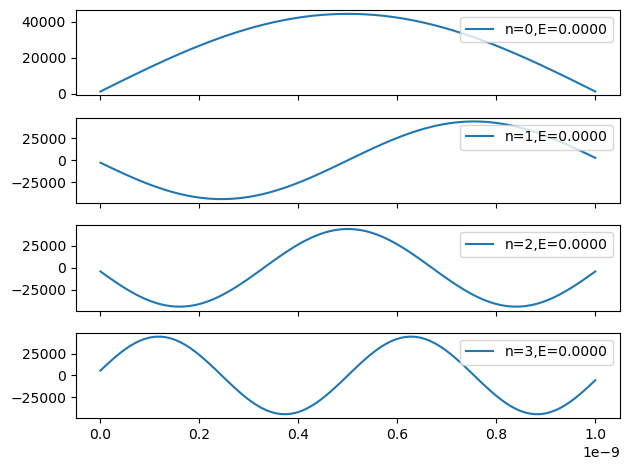

In [57]:
# -- plot the wavefunctions
k=4
fig, ax = plt.subplots(nrows=k,ncols=1,sharex=True)

for n in range(k):
  ax[n].plot(x,psi_norm[:,n],label="n={},E={:.4f}".format(n,E[n]))
  ax[n].legend(loc="upper right")
fig.tight_layout()
plt.show()


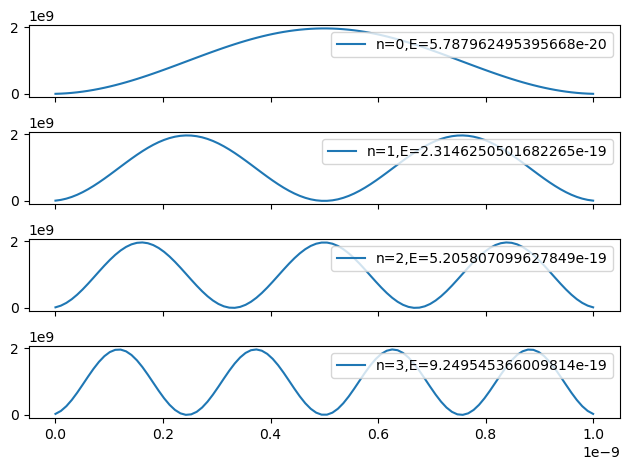

In [56]:
# probability densities for each wavefunction
k=4
fig, ax = plt.subplots(nrows=4,ncols=1,sharex=True)
rho = psi_norm.conj() * psi_norm  # because psi is real
for n in range(k):
  ax[n].plot(x,rho[:,n],label="n={},E={}".format(n,E[n]))
  ax[n].legend(loc="upper right")
fig.tight_layout()
plt.show()


# Fermi dirac
for a system of fermions at temperature $T$ and a chemical potential $\mu$, the probability that a single particle energy $E$ is occupied is
$$
f_{FD}(E)= \frac{1}{\exp\!\left(\dfrac{E-\mu}{k_B T}\right) + 1}
$$

In [58]:
k_B = 1.380649e-23   # Boltzmann constant (J/K)

# ------------------------------------------------------------
# Fermi–Dirac distribution
# ------------------------------------------------------------
def get_fermi_dirac(E, mu, T):
    """
    Fermi-Dirac occupation for energies E (J), chemical potential mu (J),
    and temperature T (K).
    Returns f(E) in [0, 1].
    """
    E = np.asarray(E, float)
    mu = float(mu)
    beta = 1.0 / (k_B * T)

    x = (E - mu) * beta

    # For large positive x: f ≈ exp(-x)
    # For large negative x: f ≈ 1 - exp(x)
    f = np.zeros_like(x)

    # Stable computation in regions
    pos = x > 50          # big positive -> f≈0
    neg = x < -50         # big negative -> f≈1

    mid = ~ (pos | neg)   # safe region

    f[pos] = 0.0
    f[neg] = 1.0
    f[mid] = 1.0 / (np.exp(x[mid]) + 1.0)

    return f


def get_chemical_potential(E, T, N_target, mu_min=None, mu_max=None, tol=1e-12):
    """
    Solve for chemical potential mu such that sum_n f(E_n, mu, T) = N_target.
    Uses bisection on [mu_min, mu_max].
    Assumes N(mu) is monotonically increasing in mu.
    """
    E = np.asarray(E, dtype=float)

    # sensible default bounds: a bit below lowest and above highest energy
    if mu_min is None:
        mu_min = E[0] - 10.0 * k_B * T
    if mu_max is None:
        mu_max = E[-1] + 10.0 * k_B * T

    # check that N_target is bracketed
    N_min = np.sum(get_fermi_dirac(E, mu_min, T))
    N_max = np.sum(get_fermi_dirac(E, mu_max, T))

    if not (N_min <= N_target <= N_max):
        raise ValueError(
            f"N_target={N_target} is not in [N(mu_min)={N_min}, N(mu_max)={N_max}]"
        )

    # bisection
    for _ in range(200):
        mu_mid = 0.5 * (mu_min + mu_max)
        N_mid = np.sum(get_fermi_dirac(E, mu_mid, T))

        if N_mid < N_target:
            # too few electrons -> increase mu
            mu_min = mu_mid
        else:
            # too many electrons -> decrease mu
            mu_max = mu_mid

        if abs(N_mid - N_target) < tol:
            return mu_mid

    return mu_mid  # fallback if tol not met


In [64]:
T = 2000.0          # K
N_target = 1       # spinless toy model: 2 fermions

mu = get_chemical_potential(E, T=T, N_target=N_target)
f_FD = get_fermi_dirac(E, mu, T)

print("Solved chemical potential:")
print(f"  mu = {mu:.4e} J  = {mu/eV:.4f} eV\n")

print("First few energies and occupations:")
for n in range(min(8, len(E))):
    print(f"n={n+1:2d}: E = {E[n]/eV:8.4f} eV   f_FD = {f_FD[n]:.6f}")

print("\nSum of occupations:", np.sum(f_FD))
print("Target N:", N_target)


Solved chemical potential:
  mu = 1.4467e-19 J  = 0.9030 eV

First few energies and occupations:
n= 1: E =   0.3613 eV   f_FD = 0.958637
n= 2: E =   1.4447 eV   f_FD = 0.041362
n= 3: E =   3.2492 eV   f_FD = 0.000001
n= 4: E =   5.7731 eV   f_FD = 0.000000
n= 5: E =   9.0139 eV   f_FD = 0.000000
n= 6: E =  12.9686 eV   f_FD = 0.000000
n= 7: E =  17.6332 eV   f_FD = 0.000000
n= 8: E =  23.0032 eV   f_FD = 0.000000

Sum of occupations: 0.9999999999999437
Target N: 1


## Spatial probability distribution



∫ rho(x) dx ≈ 1.0000000000000002
sum f_FD    = 1.0


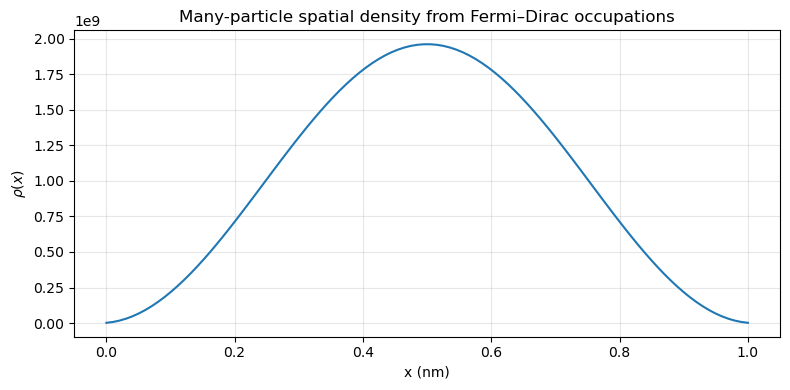

In [62]:
import numpy as np
import matplotlib.pyplot as plt

Nx, Nstates = psi.shape
k_used = len(f_FD)          # must match how many energies you used to compute f_FD

# 1) Continuum normalization of eigenfunctions
psi_norm = np.zeros_like(psi)
for n in range(k_used):     # only care about first k_used states
    norm_n = np.sqrt(np.trapezoid(np.abs(psi[:, n])**2, x))
    psi_norm[:, n] = psi[:, n] / norm_n

# 2) Build many-particle density from FD
rho_x = np.zeros_like(x)
for n in range(k_used):
    rho_x += f_FD[n] * np.abs(psi_norm[:, n])**2  # |psi|^2, not psi**2

# 3) Check normalization
N_from_rho = np.trapezoid(rho_x, x)
print("∫ rho(x) dx ≈", N_from_rho)
print("sum f_FD    =", np.sum(f_FD))

# 4) Plot
plt.figure(figsize=(8,4))
plt.plot(x*1e9, rho_x)
plt.xlabel("x (nm)")
plt.ylabel(r"$\rho(x)$")
plt.title("Many-particle spatial density from Fermi–Dirac occupations")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


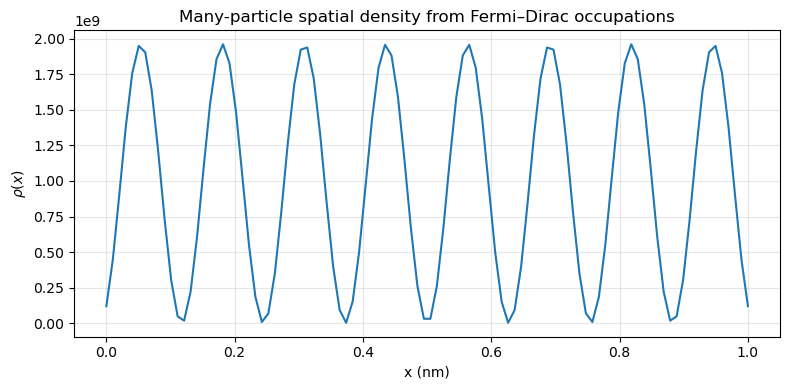

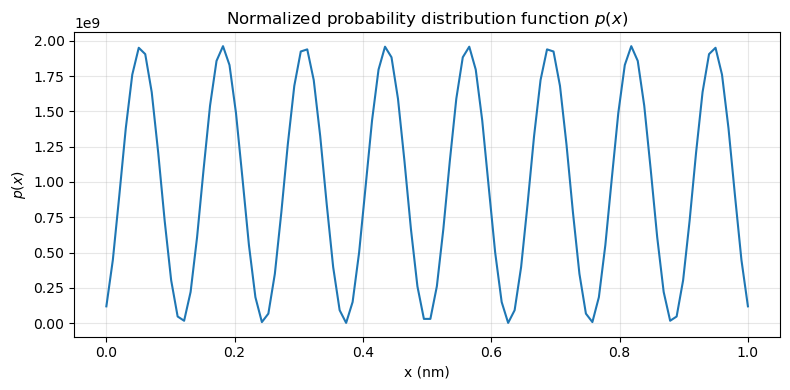

In [60]:
plt.figure(figsize=(8,4))
plt.plot(x*1e9, rho_x, label=r"$\rho(x)$ (number density)")
plt.xlabel("x (nm)")
plt.ylabel(r"$\rho(x)$")
plt.title("Many-particle spatial density from Fermi–Dirac occupations")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(x*1e9, rho_pdf, label=r"$p(x)$ (PDF)")
plt.xlabel("x (nm)")
plt.ylabel(r"$p(x)$")
plt.title("Normalized probability distribution function $p(x)$")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


$$
\psi = \sum_i f_{FD}(E_i,\mu,T) E_i \psi_i
$$